In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

bands_data = pd.read_csv('data/ma_bands_data.csv', index_col=0)

In [2]:
bands_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129471 entries, 0 to 129470
Data columns (total 10 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   name      129471 non-null  object 
 1   url       129471 non-null  object 
 2   genre     129471 non-null  object 
 3   theme     71530 non-null   object 
 4   label     79606 non-null   object 
 5   country   129471 non-null  object 
 6   location  125465 non-null  object 
 7   status    129471 non-null  object 
 8   date      128315 non-null  float64
 9   years     128414 non-null  object 
dtypes: float64(1), object(9)
memory usage: 10.9+ MB


In [3]:
bands_data.groupby('status').size()

status
Active          70708
Changed name     6011
Disputed           29
On hold          3363
Split-up        39811
Unknown          9549
dtype: int64

In [4]:
bands_data['country'].nunique()

153

In [5]:
bands_data.groupby('country').size().nlargest(20)

country
United States     25390
Germany           10447
Brazil             6615
Italy              6546
United Kingdom     5169
France             5015
Sweden             4418
Russia             4217
Canada             4016
Spain              3972
Finland            3794
Poland             3501
Mexico             3279
Chile              2574
Argentina          2566
Australia          2539
Netherlands        2274
Japan              2141
Greece             1980
Colombia           1894
dtype: int64

In [6]:
population = pd.read_csv('data/world_population.csv')
pop_2022 = population.set_index('Country')['2022 Population']
bands_country = bands_data.groupby('country').size()
bands_per_million = bands_country / (pop_2022 / 1e6)
bands_per_million.nlargest(30)

Finland             684.745463
Iceland             426.388915
Sweden              418.793694
Liechtenstein       406.845170
Norway              308.226293
Falkland Islands    264.550265
Faroe Islands       263.703146
Guernsey            205.368004
Greece              190.660138
Gibraltar           183.772857
Estonia             169.675324
Denmark             156.062439
Malta               148.138147
Austria             140.162604
Luxembourg          137.430725
Monaco              137.102745
Slovenia            133.500390
Chile               131.301523
Netherlands         129.469266
Germany             125.309100
Croatia             119.592354
Portugal            118.685232
Switzerland         114.753528
Italy               110.878728
Belgium             108.614242
Hungary             106.949640
Greenland           106.258634
Slovakia            105.609101
Canada              104.435581
Australia            96.992014
dtype: float64

In [7]:
bands_per_million.nsmallest(30)

Ethiopia        0.008105
Afghanistan     0.024314
Mozambique      0.060662
Uganda          0.063493
Kenya           0.092545
Myanmar         0.129201
Zimbabwe        0.183817
India           0.189814
Palestine       0.190474
Pakistan        0.212022
Angola          0.224789
Uzbekistan      0.231029
Cambodia        0.238552
China           0.251072
Iraq            0.269686
Tajikistan      0.301423
Turkmenistan    0.311005
Saudi Arabia    0.384522
Egypt           0.423461
Oman            0.437034
Bangladesh      0.473169
Vietnam         0.499048
Madagascar      0.574097
Algeria         0.645833
Laos            0.664057
Morocco         0.747504
Namibia         0.779116
Libya           0.880755
Jamaica         1.061054
Nepal           1.080282
dtype: float64

In [8]:
bands_per_million['China']

0.25107172965938196

In [9]:
bands_per_million[bands_per_million > 10].nsmallest(30)

Bahrain                   10.188605
Lebanon                   10.383007
Reunion                   11.293032
Belize                    12.337393
Moldova                   13.137810
Maldives                  15.273384
Malaysia                  16.323778
Venezuela                 16.712779
New Caledonia             17.244352
Japan                     17.272858
Peru                      18.296844
Panama                    19.280580
Romania                   21.821770
Bolivia                   23.396386
Isle of Man               23.663318
Montenegro                23.920317
Mexico                    25.716815
El Salvador               26.355693
Ukraine                   27.479905
Guam                      29.108014
Russia                    29.140373
Paraguay                  29.937718
Ecuador                   30.498306
Brazil                    30.722644
Israel                    31.089886
Bosnia and Herzegovina    36.183411
Colombia                  36.511530
Belarus                   41

In [10]:
bands_data[bands_data['country'] == 'Falkland Islands']

,name,url,genre,theme,label,country,location,status,date,years
16551,Bloodrust,https://www.metal-archives.com/bands/Bloodrust...,Death Metal,"['War', ' Death', ' Oppression', ' Madness', '...",NaN,Falkland Islands,NaN,Active,2010.0,2010-present


In [11]:
countries = pd.read_csv('data/countries of the world.csv')
countries['Country'] = countries['Country'].str.strip()
area = countries.set_index('Country')['Area (sq. mi.)']
bands_per_thousand_sq_mi = bands_country / (area / 1e3)
bands_per_thousand_sq_mi.nlargest(30)

Monaco            2500.000000
Gibraltar          857.142857
Singapore          375.180375
Malta              250.000000
Guernsey           166.666667
Liechtenstein      100.000000
Jersey              60.344828
Netherlands         54.760873
Belgium             41.470126
Hong Kong           35.714286
Luxembourg          34.416087
San Marino          32.786885
Germany             29.261584
Maldives            26.666667
Switzerland         24.291596
Bahrain             22.556391
Italy               21.730903
Denmark             21.302269
United Kingdom      21.113471
Greece              15.006821
Austria             14.939788
Slovenia            13.959453
Israel              13.529129
Portugal            13.193926
Slovakia            12.201863
Puerto Rico         11.675127
Hungary             11.458669
Finland             11.220039
Poland              11.196572
Faroe Islands       10.007148
dtype: float64

In [12]:
bands_per_thousand_sq_mi.nsmallest(30)

Ethiopia        0.000887
Afghanistan     0.001544
Namibia         0.002423
Mozambique      0.002495
Greenland       0.002770
Libya           0.003410
Mongolia        0.003836
Turkmenistan    0.004098
Angola          0.006417
Saudi Arabia    0.007141
Zimbabwe        0.007681
Kenya           0.008581
Oman            0.009414
Botswana        0.011659
Algeria         0.012176
Suriname        0.012250
Uganda          0.012710
Uzbekistan      0.017881
Tajikistan      0.020964
Kazakhstan      0.020977
Laos            0.021115
Cambodia        0.022095
Guyana          0.023259
Iraq            0.027455
Madagascar      0.028959
China           0.037303
Kyrgyzstan      0.045340
Egypt           0.046932
Pakistan        0.062194
Morocco         0.062703
dtype: float64

In [13]:
bands_data[bands_data['country'] == 'Gibraltar']

,name,url,genre,theme,label,country,location,status,date,years
6139,Angelwings,https://www.metal-archives.com/bands/Angelwing...,Symphonic Metal,['Mystical fantasy'],NaN,Gibraltar,Gibraltar,Active,2013.0,2013-present
28627,Days of Our Lives,https://www.metal-archives.com/bands/Days_of_O...,Depressive Black Metal,"['Depression', ' Loneliness', ' Suicide']",NaN,Gibraltar,Gibraltar,Split-up,2010.0,2010-?
49807,Gomorrah's Ruin,https://www.metal-archives.com/bands/Gomorrah%...,Black/Death Metal,"['Satanism', ' Blasphemy', ' Perversion']",Unsigned/independent,Gibraltar,Gibraltar,Unknown,2020.0,2020-?
73076,Meta-Stasis,https://www.metal-archives.com/bands/Meta-Stas...,Death/Nu-Metal,"['Insanity', ' Murder', ' Death']",NaN,Gibraltar,"Gibraltar (early); London, England, United Kin...",Active,2004.0,"2004-2008 (as),2008-present"
85114,Oracle,https://www.metal-archives.com/bands/Oracle/80417,Melodic Heavy Metal,"['Dreams', ' Death', ' Life situations']",NaN,Gibraltar,Gibraltar,Split-up,1987.0,1987-1989
102370,Sinister Sacrament,https://www.metal-archives.com/bands/Sinister_...,Blackened Doom/Death Metal,"['Horror', ' Occult', ' Death', ' Mental illne...",Unsigned/independent,Gibraltar,Gibraltar,Active,2021.0,"2014-2021 (as),2021-present"


In [14]:
bands_data.groupby('location').size().nlargest(20)

location
Santiago                       1039
Athens, Attica                  983
Moscow                          976
São Paulo, São Paulo            938
Tokyo                           836
Los Angeles, California         828
Buenos Aires                    817
Mexico City                     806
Bogota                          692
London, England                 670
Chicago, Illinois               649
Stockholm                       637
Melbourne, Victoria             602
Paris, Île-de-France            596
Helsinki, Uusimaa               559
Montréal, Quebec                512
Rome, Lazio                     506
New York, New York              503
Madrid, Community of Madrid     488
Portland, Oregon                464
dtype: int64

In [15]:
bands_data['theme'].str.findall('[0-9A-Za-z][0-9A-Za-z/\-\s]*').explode().str.strip().value_counts().nlargest(30)

Death                14699
War                   7168
Darkness              5391
Gore                  4370
Satanism              4202
Life                  3909
Violence              3645
Nature                3123
Society               3111
Fantasy               3041
Anti-Christianity     2847
Occultism             2792
Hate                  2752
Misanthropy           2615
Depression            2515
Politics              2253
Evil                  2178
Horror                2132
Anti-religion         1818
Blasphemy             1770
Philosophy            1713
Christianity          1710
Instrumental          1688
Love                  1663
Paganism              1648
Religion              1612
Hatred                1553
History               1456
Mythology             1443
Satan                 1369
Name: theme, dtype: int64

In [16]:
bands_data['theme'].str.findall('[0-9A-Za-z][0-9A-Za-z/\-\s]*').explode().str.strip().value_counts()['Peace']

33

In [17]:
bands_data['theme'].str.findall('[0-9A-Za-z][0-9A-Za-z/\-\s]*').explode().str.strip().value_counts()['Light']

29

In [18]:
year_ranges = bands_data['years'].str.findall('\d\d\d\d-\d\d\d\d|\d\d\d\d-present').explode()
year_ranges = year_ranges.str.replace('present', '2022').str.split('-').dropna()

count = dict()
for begin, end in year_ranges:
    for y in range(int(begin), int(end) + 1):
        count[y] = count.get(y, 0) + 1
count = {k : v for k, v in sorted(count.items())}

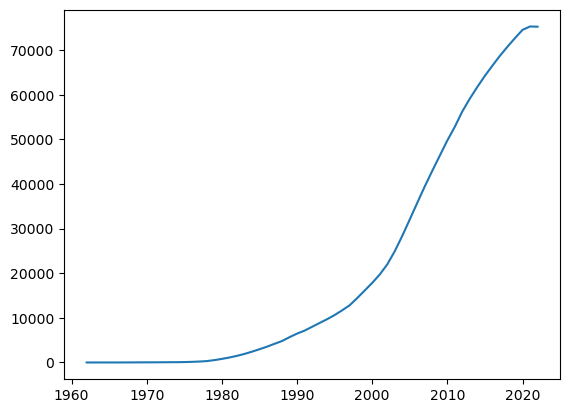

In [19]:
plt.plot(count.keys(), count.values())